<a href="https://colab.research.google.com/github/SergeyB81/Portfolio-DS/blob/main/Car%20price/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/shubh0799/churn-modelling

# **Загрузка данных**

In [131]:
! gdown --id 1Ym8EaWePP17RvrweKhWzCJmITXLgqvCZ

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ym8EaWePP17RvrweKhWzCJmITXLgqvCZ
To: /content/churn-modeling.zip
100% 268k/268k [00:00<00:00, 5.78MB/s]


In [132]:
import pandas as pd

In [133]:
df = pd.read_csv('/content/churn-modeling.zip')

In [134]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Анализ данных**

In [135]:
len(df)

10000

In [136]:
df.isna().mean()

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


In [137]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [138]:
df['Exited'].value_counts(normalize=True)

,proportion
Exited,
0,0.7963
1,0.2037


In [139]:
df['Exited'].mean()

np.float64(0.2037)

# **Обучающая, тестовая и валидационная выборка**

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
train, test = train_test_split(df,train_size=0.6,random_state=42,stratify=df['Exited'])

In [142]:
val, test = train_test_split(test,train_size=0.5,random_state=42,stratify=test['Exited'])

In [143]:
df['Exited'].mean()

np.float64(0.2037)

In [144]:
train['Exited'].mean()

np.float64(0.20366666666666666)

In [145]:
val['Exited'].mean()

np.float64(0.204)

In [146]:
test['Exited'].mean()

np.float64(0.2035)

# **Phik**

In [147]:
train_full = pd.concat([train,val])

In [148]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0
6727,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1
4745,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1
1307,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0


In [149]:
! pip install phik

In [150]:
import phik

In [151]:
phik_owerview = train_full.phik_matrix()

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


/usr/local/lib/python3.11/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Surname is large: 2591. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  warnings.warn(


In [152]:
phik_owerview['Exited'].sort_values(ascending=False)

,Exited
Exited,1.000000
NumOfProducts,0.564969
Age,0.498241
IsActiveMember,0.237244
Balance,0.167823
Gender,0.165231
CreditScore,0.123343
Geography,0.104047
CustomerId,0.035798
Tenure,0.033611


# **Человеческое обучение**

In [153]:
train_full.groupby('NumOfProducts')['Exited'].agg(['count', 'mean'])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


In [154]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0
6727,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1
4745,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1
1307,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0


In [155]:
model = train_full.groupby('NumOfProducts')['Exited'].mean().reset_index()

In [156]:
model

,NumOfProducts,Exited
0,1,0.275369
1,2,0.077049
2,3,0.826484
3,4,1.000000


In [157]:
model = model.rename({'Exited':'score_prod'},axis=1)

In [158]:
model

,NumOfProducts,score_prod
0,1,0.275369
1,2,0.077049
2,3,0.826484
3,4,1.000000


In [159]:
train_full = train_full.merge(model,how='left',on='NumOfProducts')

In [160]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049


In [161]:
train_full.groupby('score_prod')['Exited'].agg(['count', 'mean'])

,count,mean
score_prod,,
0.077049,3673,0.077049
0.275369,4060,0.275369
0.826484,219,0.826484
1.000000,48,1.000000


# **Baseline**

In [162]:
train_full['score_mean'] = train_full['Exited'].mean()

In [163]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369,0.20375
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369,0.20375
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369,0.20375
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049,0.20375


In [164]:
from sklearn.metrics import log_loss

In [165]:
log_loss(train_full['Exited'],train_full['score_mean'])

0.5055572860042145

In [166]:
log_loss(train_full['Exited'],train_full['score_prod'])

0.4359616823203511

# **Uplift**



In [167]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369,0.20375
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369,0.20375
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369,0.20375
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049,0.20375


In [168]:
train_full['Exited'].mean()

np.float64(0.20375)

In [169]:
train_full['Exited'].sample(frac=0.5,random_state=42).mean()

np.float64(0.20675)

In [170]:
exited_all = train_full['Exited'].sum()

In [171]:
exited_all

np.int64(1630)

In [172]:
train_full['Exited'].sample(frac=0.2,random_state=42).sum()

np.int64(337)

In [173]:
train_full['Exited'].sample(frac=0.2,random_state=42).sum() / exited_all

np.float64(0.2067484662576687)

In [174]:
train_full = train_full.sort_values('score_prod',ascending=False)

In [175]:
round(len(train_full) * 0.2)

1600

In [176]:
train_full.head(round(len(train_full) * 0.2))['Exited'].sum() / exited_all

np.float64(0.37055214723926383)

In [177]:

0.3588957055214724 / 0.2067484662576687

1.7359050445103856

# **Добавим шум**

In [178]:
import numpy as np

In [179]:
np.random.seed(42)

In [180]:
np.random.uniform(0,0.001,size=len(train_full))

array([0.00037454, 0.00095071, 0.00073199, ..., 0.00045533, 0.00090844,
       0.00010448])

In [181]:
np.random.seed(42)
train_full['score_prod'] = train_full['score_prod'] - np.random.uniform(0,0.001,size=len(train_full))

In [182]:
train_full['score_prod'].nunique()

8000

# **Функция для Uplift**

In [183]:
exited_all = train_full['Exited'].sum()

In [184]:
exited_all

np.int64(1630)

In [185]:
train_full = train_full.sort_values('score_prod',ascending=False)

In [186]:
train_full.head(round(len(train_full) * 0.2))['Exited'].sum() / exited_all


np.float64(0.36871165644171777)

In [187]:
0.36871165644171777 / 0.2

1.8435582822085887

In [188]:
def uplift(df,score,pct):
  exited_all = df['Exited'].sum()
  df = df.sort_values(score,ascending=False)
  exited_found = df.head(round(len(df) * pct))['Exited'].sum()

  return exited_found / (exited_all *  pct )


In [189]:
uplift(train_full,'score_prod',0.2)

np.float64(1.843558282208589)

In [190]:
test = test.merge(model,how='left',on='NumOfProducts')

In [191]:
np.random.seed(42)
test['score_prod'] = test['score_prod'] - np.random.uniform(0,0.001,len(test))

In [192]:
log_loss(train_full['Exited'],train_full['score_prod'])

0.4359493168066671

In [193]:
log_loss(test['Exited'],test['score_prod'])

0.4338658337619006

In [194]:
uplift(test,'score_prod',0.2)

np.float64(1.8427518427518426)

# **Добавим возраст**

In [195]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

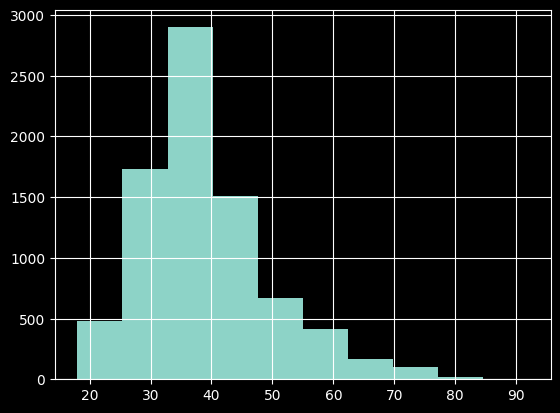

In [196]:
train_full['Age'].hist();

In [197]:
pd.qcut(train_full['Age'],5,retbins=True,labels=False)

(568     3
 4564    4
 7344    3
 4754    4
 7847    4
        ..
 3183    0
 603     4
 6739    0
 2609    1
 2222    4
 Name: Age, Length: 8000, dtype: int64,
 array([18., 31., 35., 40., 46., 92.]))

In [198]:
train_full['age_group'] = pd.cut(train_full['Age'],[0,31,35,40,46,float('inf')])

In [199]:
train_full.groupby('age_group')['Exited'].agg(['count','mean'])

<ipython-input-199-aa505e31857f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_full.groupby('age_group')['Exited'].agg(['count','mean'])


,count,mean
age_group,,
"(0.0, 31.0]",1896,0.075422
"(31.0, 35.0]",1424,0.091994
"(35.0, 40.0]",1797,0.146912
"(40.0, 46.0]",1376,0.289971
"(46.0, inf]",1507,0.459854


In [200]:
model = train_full.groupby(['NumOfProducts', 'age_group'])['Exited'].mean().reset_index()

<ipython-input-200-cf11bf8a90e9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model = train_full.groupby(['NumOfProducts', 'age_group'])['Exited'].mean().reset_index()


In [201]:
model = model.rename({'Exited':'score_prod_age'},axis=1)

In [202]:
model

,NumOfProducts,age_group,score_prod_age
0,1,"(0.0, 31.0]",0.106774
1,1,"(31.0, 35.0]",0.135908
2,1,"(35.0, 40.0]",0.198646
3,1,"(40.0, 46.0]",0.378873
4,1,"(46.0, inf]",0.542506
5,2,"(0.0, 31.0]",0.029293
6,2,"(31.0, 35.0]",0.031206
7,2,"(35.0, 40.0]",0.059977
8,2,"(40.0, 46.0]",0.106239
9,2,"(46.0, inf]",0.225869


In [203]:
train_full = train_full.merge(model,how='left',on=['NumOfProducts','age_group'])

In [204]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean,age_group,score_prod_age
0,5701,15812888,Perreault,447,France,Male,41,3,0.00,4,1,1,197490.39,1,0.999979,0.20375,"(40.0, 46.0]",1.000000
1,6280,15608338,Chiemenam,757,Spain,Female,55,9,117294.12,4,1,0,94187.47,1,0.999966,0.20375,"(46.0, inf]",1.000000
2,9256,15622033,Rapuluchukwu,847,Germany,Female,41,3,101543.51,4,1,0,16025.17,1,0.999954,0.20375,"(40.0, 46.0]",1.000000
3,9324,15815316,Kennedy,644,France,Male,50,9,76817.00,4,1,0,196371.13,1,0.999942,0.20375,"(46.0, inf]",1.000000
4,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,0.999935,0.20375,"(46.0, inf]",1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9290,15676810,Jen,561,France,Female,31,1,81480.27,2,1,1,65234.60,0,0.076050,0.20375,"(0.0, 31.0]",0.029293
7996,8606,15748920,Cherkasova,561,France,Female,49,8,0.00,2,1,1,12513.07,0,0.076050,0.20375,"(46.0, inf]",0.225869
7997,7860,15646374,Wynne,766,Germany,Female,28,3,62717.84,2,1,1,13182.43,0,0.076050,0.20375,"(0.0, 31.0]",0.029293
7998,3855,15580935,Okechukwu,687,Germany,Male,33,9,135962.40,2,1,0,121747.96,0,0.076049,0.20375,"(31.0, 35.0]",0.031206


In [205]:
log_loss(train_full['Exited'],train_full['score_prod'])

0.4359493168066671

In [206]:
uplift(train_full,'score_prod',0.2)

np.float64(1.843558282208589)

In [207]:
log_loss(train_full['Exited'],train_full['score_prod_age'])

0.3866695862492173

In [208]:
uplift(train_full,'score_prod_age',0.2)

np.float64(2.684049079754601)

In [209]:
test['age_group'] = pd.cut(test['Age'],[0,31,35,40,46,float('inf')])

In [210]:
test = test.merge(model,how='left',on=['NumOfProducts','age_group'])

In [211]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,age_group,score_prod_age
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076392,"(46.0, inf]",0.225869
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977


In [212]:
log_loss(test['Exited'],test['score_prod'])

0.4338658337619006

In [213]:
uplift(test,'score_prod',0.2)

np.float64(1.8427518427518426)

In [214]:
log_loss(test['Exited'],test['score_prod_age'])

0.3870707514157596

In [215]:
uplift(test,'score_prod_age',0.2)

np.float64(2.800982800982801)

# **Добавим IsActiveMember**

In [216]:
train_full['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,4131
0,3869


In [217]:
train_full.groupby('IsActiveMember')['Exited'].agg(['count', 'mean'])

,count,mean
IsActiveMember,,
0,3869,0.267511
1,4131,0.144033


In [218]:
model = train_full.groupby(['NumOfProducts', 'age_group', 'IsActiveMember'])['Exited'].mean().reset_index()

<ipython-input-218-75e2631a8b48>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model = train_full.groupby(['NumOfProducts', 'age_group', 'IsActiveMember'])['Exited'].mean().reset_index()


In [219]:
model

,NumOfProducts,age_group,IsActiveMember,Exited
0,1,"(0.0, 31.0]",0,0.143885
1,1,"(0.0, 31.0]",1,0.072687
2,1,"(31.0, 35.0]",0,0.177650
3,1,"(31.0, 35.0]",1,0.094286
4,1,"(35.0, 40.0]",0,0.223714
5,1,"(35.0, 40.0]",1,0.173121
6,1,"(40.0, 46.0]",0,0.466146
7,1,"(40.0, 46.0]",1,0.276074
8,1,"(46.0, inf]",0,0.793103
9,1,"(46.0, inf]",1,0.334016


In [220]:
model = model.rename({'Exited':'score_prod_age_active'},axis=1)

In [221]:
train_full = train_full.merge(model,how='left',on=['NumOfProducts','age_group','IsActiveMember'])

In [222]:
test = test.merge(model,how='left',on=['NumOfProducts','age_group','IsActiveMember'])

In [223]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,age_group,score_prod_age,score_prod_age_active
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076392,"(46.0, inf]",0.225869,0.134048
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646,0.173121
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239,0.144262
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977,0.042353


In [224]:
def print_metrics(df,score):
  print(log_loss(df['Exited'],df[score]))
  print(uplift(df,score,0.2))

In [225]:
print_metrics(train_full,'score_prod_age')

0.3866695862492173
2.684049079754601


In [226]:
print_metrics(test,'score_prod_age')

0.3870707514157596
2.800982800982801


In [227]:
print_metrics(train_full,'score_prod_age_active')

0.36550197514510024
2.871165644171779


In [228]:
print_metrics(test,'score_prod_age_active')

0.3638472889481342
2.8501228501228497


# **Машинное обучение**

In [229]:
! pip install catboost

In [230]:
from catboost import CatBoostClassifier

In [231]:
train_full.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'score_prod',
       'score_mean', 'age_group', 'score_prod_age', 'score_prod_age_active'],
      dtype='object')

In [232]:
X = ['NumOfProducts', 'Age', 'IsActiveMember']
y = ['Exited']

In [233]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.01}

In [234]:
model = CatBoostClassifier(**params)

In [235]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.6849803	test: 0.6849389	best: 0.6849389 (0)	total: 4.71ms	remaining: 4.7s
100:	learn: 0.3991169	test: 0.3930537	best: 0.3930537 (100)	total: 461ms	remaining: 4.1s
200:	learn: 0.3659581	test: 0.3563817	best: 0.3563817 (200)	total: 685ms	remaining: 2.72s
300:	learn: 0.3589224	test: 0.3476566	best: 0.3476566 (300)	total: 925ms	remaining: 2.15s
400:	learn: 0.3565171	test: 0.3446648	best: 0.3446648 (400)	total: 1.07s	remaining: 1.6s
500:	learn: 0.3553274	test: 0.3433005	best: 0.3432984 (498)	total: 1.21s	remaining: 1.21s
600:	learn: 0.3544987	test: 0.3425379	best: 0.3425379 (600)	total: 1.52s	remaining: 1.01s
700:	learn: 0.3539638	test: 0.3421168	best: 0.3421135 (699)	total: 1.78s	remaining: 761ms
800:	learn: 0.3532817	test: 0.3419139	best: 0.3419139 (800)	total: 2.16s	remaining: 536ms
900:	learn: 0.3524351	test: 0.3416923	best: 0.3416923 (900)	total: 2.63s	remaining: 290ms
999:	learn: 0.3513546	test: 0.3417688	best: 0.3416551 (927)	total: 3.03s	remaining: 0us

bestTest = 0.3416

In [236]:
test['score_cat_prod_age_active'] = model.predict_proba(test[X])[:,1]

In [237]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,age_group,score_prod_age,score_prod_age_active,score_cat_prod_age_active
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076392,"(46.0, inf]",0.225869,0.134048,0.052185
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646,0.173121,0.127713
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239,0.144262,0.147568
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977,0.042353,0.039976


In [238]:
test['score_cat_prod_age_active'].nunique()

254

In [239]:
len(test)

2000

In [240]:
print_metrics(test,'score_prod_age_active')

0.3638472889481342
2.8501228501228497


In [241]:
print_metrics(test,'score_cat_prod_age_active')

0.35878132799643003
2.8746928746928746


# **Обучимся на всех фичах**

In [242]:
train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [243]:
train


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1468,15681843,Barbour,624,Germany,Female,35,0,180303.24,2,1,0,163587.90,0
4644,4645,15714240,Ponomarev,712,Spain,Male,74,5,0.00,2,0,0,151425.82,0
8942,8943,15709780,Azuka,667,France,Female,37,9,71786.90,2,1,1,67734.79,0
2935,2936,15689425,Olejuru,687,Spain,Male,35,8,100988.39,2,1,0,22247.27,0


In [244]:
train.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [252]:
train.select_dtypes(include='object')

,Surname,Geography,Gender
6851,Cantamessa,Germany,Female
7026,Horton,France,Female
5705,Doherty,Germany,Male
9058,Moran,Spain,Female
9415,Hunt,Germany,Female
...,...,...,...
1467,Barbour,Germany,Female
4644,Ponomarev,Spain,Male
8942,Azuka,France,Female
2935,Olejuru,Spain,Male


In [255]:
X = ['CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

cat_features = ['Geography','Gender']

y = ['Exited']


In [256]:
from catboost import Pool

train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features
                 )


In [257]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.01}



In [259]:
model = CatBoostClassifier(**params)


In [260]:
model.fit(train_data,eval_set=valid_data)


0:	learn: 0.6848575	test: 0.6849145	best: 0.6849145 (0)	total: 6.61ms	remaining: 6.61s
100:	learn: 0.3908412	test: 0.3894043	best: 0.3894043 (100)	total: 1.45s	remaining: 12.9s
200:	learn: 0.3457312	test: 0.3445503	best: 0.3445503 (200)	total: 2.98s	remaining: 11.8s
300:	learn: 0.3288071	test: 0.3307084	best: 0.3307084 (300)	total: 3.89s	remaining: 9.03s
400:	learn: 0.3192987	test: 0.3252459	best: 0.3252459 (400)	total: 4.48s	remaining: 6.7s
500:	learn: 0.3120470	test: 0.3221057	best: 0.3221057 (500)	total: 5.1s	remaining: 5.08s
600:	learn: 0.3054735	test: 0.3204300	best: 0.3204300 (600)	total: 5.69s	remaining: 3.78s
700:	learn: 0.2997053	test: 0.3192377	best: 0.3192377 (700)	total: 6.29s	remaining: 2.68s
800:	learn: 0.2946934	test: 0.3188206	best: 0.3187917 (794)	total: 6.88s	remaining: 1.71s
900:	learn: 0.2890177	test: 0.3185731	best: 0.3185731 (900)	total: 7.46s	remaining: 820ms
999:	learn: 0.2831978	test: 0.3186396	best: 0.3185004 (978)	total: 8.02s	remaining: 0us

bestTest = 0.318

In [262]:
test['score_cat_prod_age_active_all_features'] = model.predict_proba(test[X])[:,1]

In [267]:
print_metrics(test,'score_cat_prod_age_active')

0.35878132799643003
2.8746928746928746


In [268]:
print_metrics(test,'score_cat_prod_age_active_all_features')

0.3296082204006806
3.1449631449631448


# **Feature importances**

In [271]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,NumOfProducts,27.408724
1,Age,21.567747
2,Balance,11.455919
3,Geography,10.011145
4,IsActiveMember,7.420335
5,EstimatedSalary,5.163513
6,CustomerId,4.965796
7,CreditScore,4.482999
8,Tenure,3.637201
9,Gender,3.089379


In [274]:
phik_owerview['Exited'].sort_values(ascending=False)

,Exited
Exited,1.000000
NumOfProducts,0.564969
Age,0.498241
IsActiveMember,0.237244
Balance,0.167823
Gender,0.165231
CreditScore,0.123343
Geography,0.104047
CustomerId,0.035798
Tenure,0.033611


# **Shap**

In [275]:
! pip install shap

In [277]:
import shap
shap.initjs()

In [278]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

<ipython-input-283-e55b7847ecf3>:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values,test[X]);


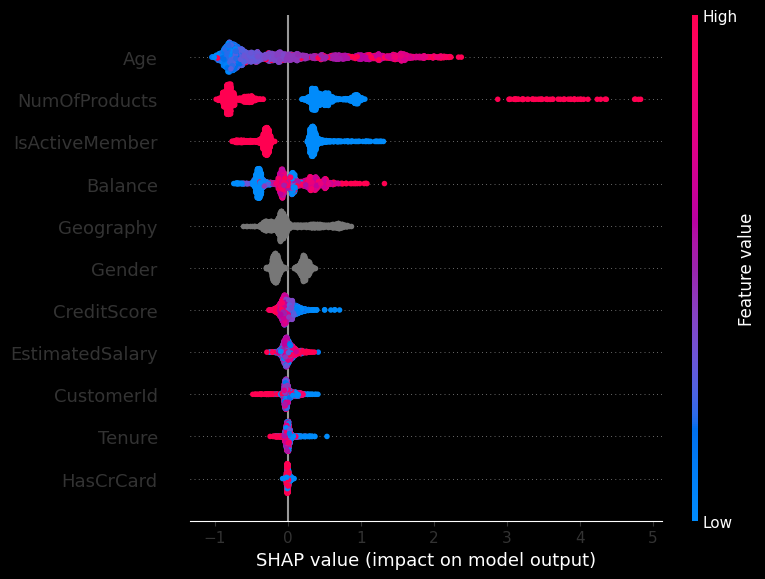

In [283]:
shap.summary_plot(shap_values,test[X]);

In [284]:
train_full.groupby('NumOfProducts')['Exited'].agg(['count','mean'])


,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


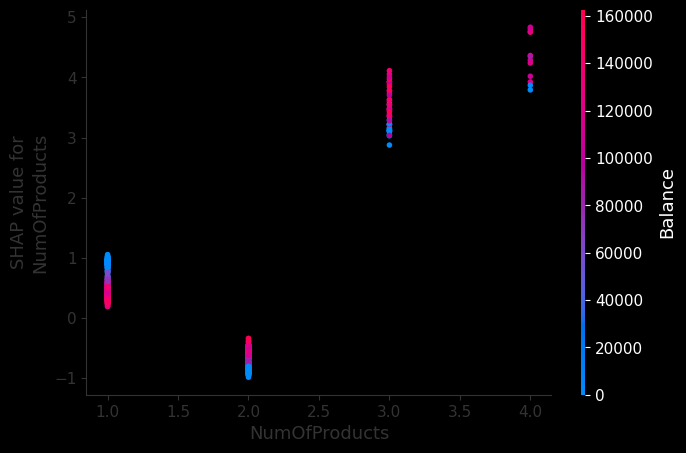

In [286]:
shap.dependence_plot('NumOfProducts',shap_values,test[X])

In [293]:
features = model.get_feature_importance(prettified=True)['Feature Id'].values

In [294]:
features

array(['NumOfProducts', 'Age', 'Balance', 'Geography', 'IsActiveMember',
       'EstimatedSalary', 'CustomerId', 'CreditScore', 'Tenure', 'Gender',
       'HasCrCard'], dtype=object)

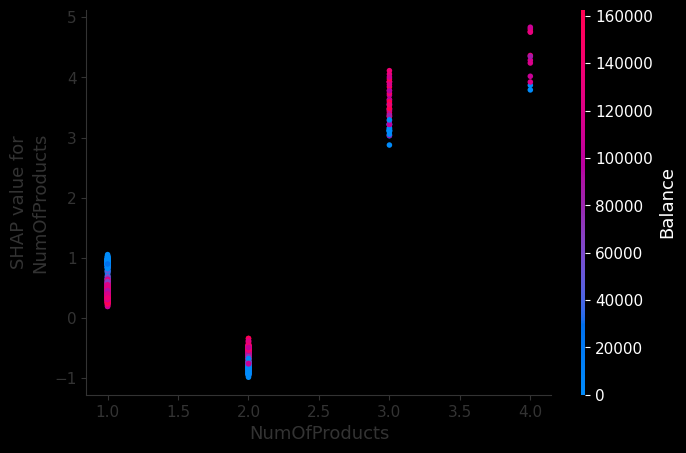

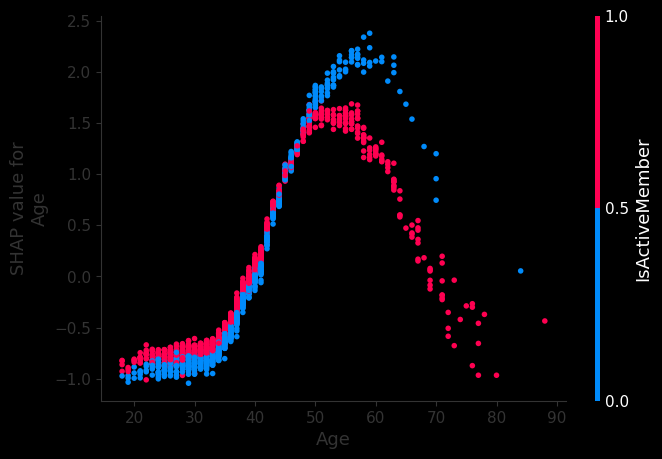

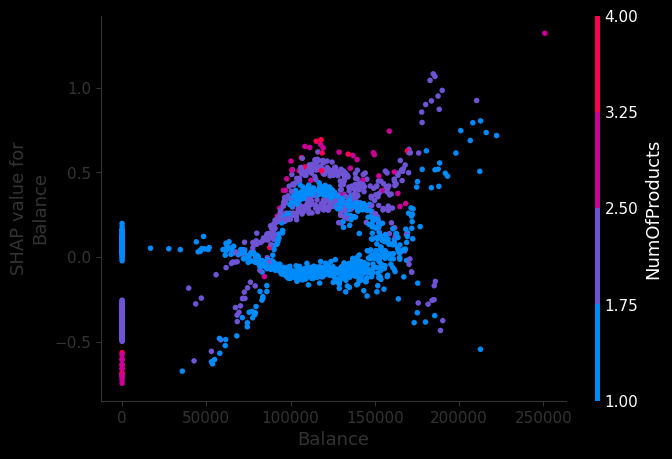

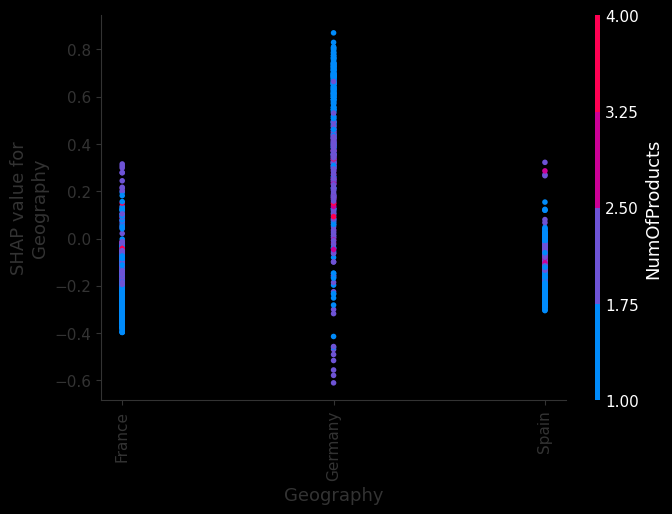

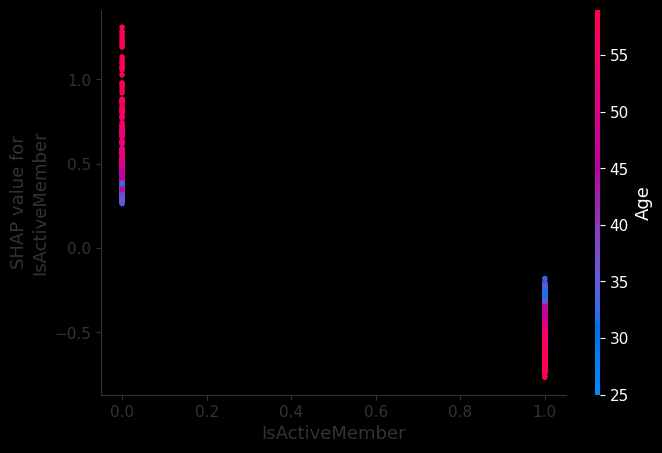

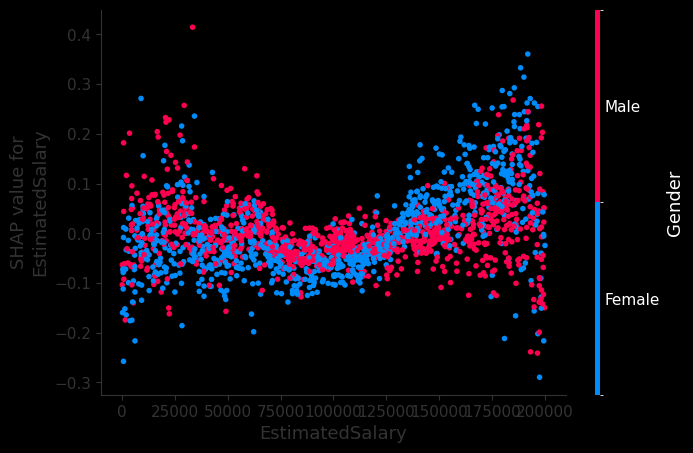

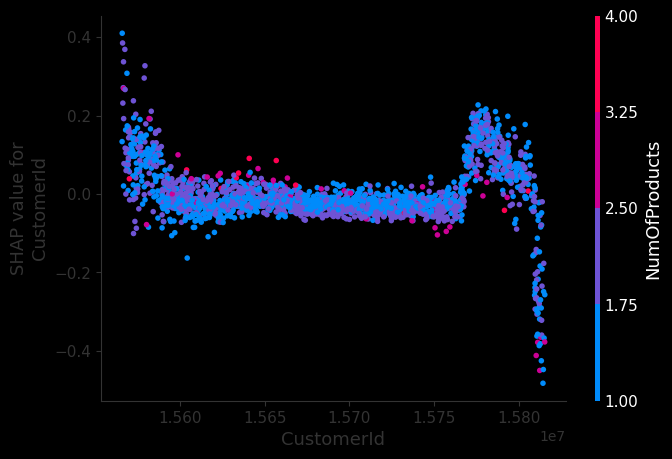

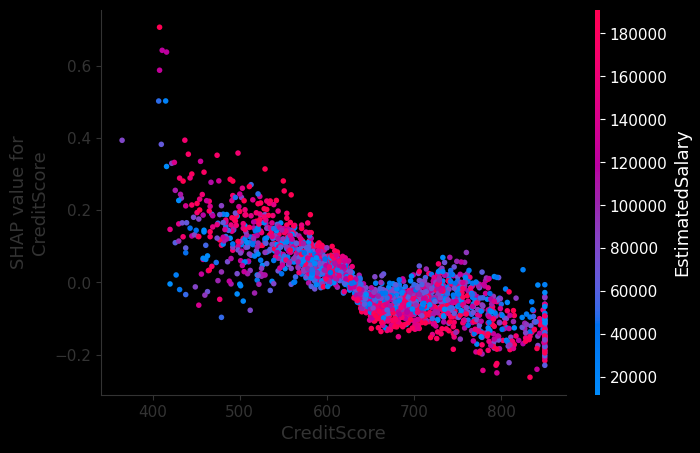

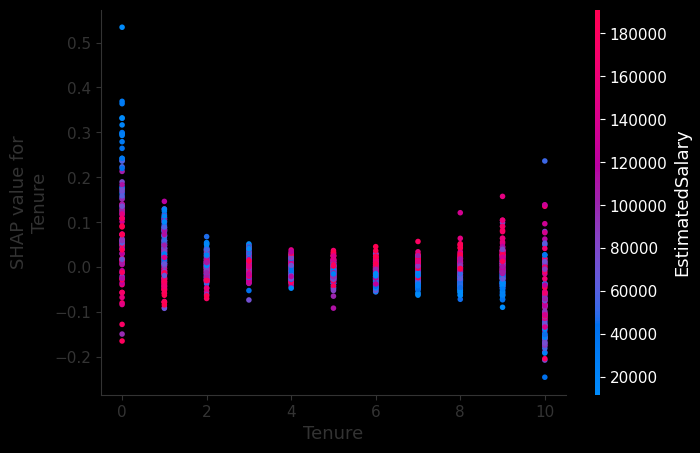

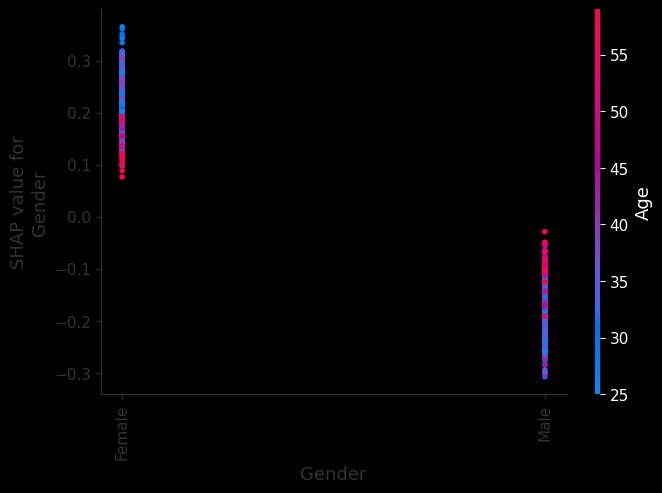

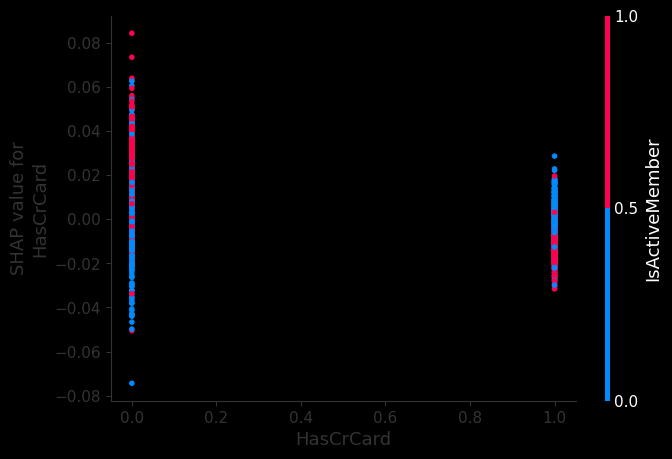

In [295]:
for feature in features:
  shap.dependence_plot(feature,shap_values,test[X])

# **Классификция == Регрессия (технически)**

In [297]:
model.predict(test[X],prediction_type='RawFormulaVal')

array([-1.88475323, -2.52652396, -1.47044046, ..., -1.73922605,
       -2.68750234, -2.93959577])

In [298]:
pd.Series(model.predict(test[X],prediction_type='RawFormulaVal'))

,0
0,-1.884753
1,-2.526524
2,-1.470440
3,-2.345759
4,-2.812393
...,...
1995,-3.592063
1996,-2.379983
1997,-1.739226
1998,-2.687502


<Axes: >

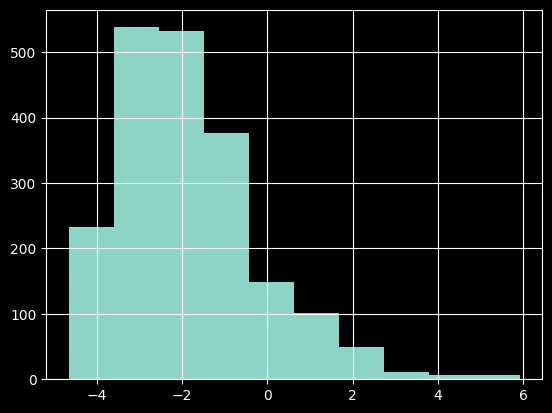

In [299]:
pd.Series(model.predict(test[X],prediction_type='RawFormulaVal')).hist()

In [300]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [301]:
pd.Series(model.predict(test[X],prediction_type='RawFormulaVal')).apply(sigmoid)

,0
0,0.131844
1,0.074020
2,0.186876
3,0.087403
4,0.056658
...,...
1995,0.026803
1996,0.084712
1997,0.149411
1998,0.063715


In [302]:
model.predict_proba(test[X])

array([[0.86815614, 0.13184386],
       [0.92598046, 0.07401954],
       [0.81312433, 0.18687567],
       ...,
       [0.85058873, 0.14941127],
       [0.93628515, 0.06371485],
       [0.94976945, 0.05023055]])

In [305]:
model.predict(test[X],prediction_type='Probability')

array([[0.86815614, 0.13184386],
       [0.92598046, 0.07401954],
       [0.81312433, 0.18687567],
       ...,
       [0.85058873, 0.14941127],
       [0.93628515, 0.06371485],
       [0.94976945, 0.05023055]])